# **Credit Card Approval Prediction**

Capstone Project

# **Introduction**

The entire banking sector relies on the practice of borrowing and lending. Banks borrow money from depositors and other sources and lend that money to borrowers who need it.

During the lending process, banks carry out credit analysis to evaluate the creditworthiness of a borrower which helps in risk assessment and getting an overall view of the applicant's financial standing by analyzing the credit history. It also helps in maintaining profitability, minimizing the risk of fraudulent activities, and enhancing the customer experience.

Predicting good clients is important for banks in today's world because it can help them to:

Reduce risk: Banks can use predictive models to identify customers who are more likely to default on their loans or credit cards. This can help banks to reduce their risk of losses.
Increase profitability: Banks can use predictive models to identify customers who are more likely to be profitable. This can help banks to increase their revenue and profits.
Improve customer satisfaction: Banks can use predictive models to offer customers the products and services that they are most likely to need and use. This can help to improve customer satisfaction and loyalty.


## **Overview of the dataset**

We will work on `Credit_card.csv` dataset which contains **18 features** and **1548 observations**. Each observation contains personal, financial, and employment data of an individual. The **target variable is binary** and is stored in `Credit_card_label.csv` file.


# **Dataset Description**:
Features Name: Credit_card.csv, Credit_card_label.csv


*   **Ind_ID**: Client ID

*   **Gender**: Gender information

*   **Car_owner**: Having a car or not
*   **Propert_owner**: Having property or not


*   **Children**: Count of children


*   **Annual_income**: Annual income


*   **Type_Income**: Income type

*   **Education**: Education level

*   **Marital_status**: Marital_status
*   **Housing_type**: Living style Birthday_count: Use backward count from the current day (0), -1 means yesterday.


*   **Employed_days**: Start date of employment. Use backward count from the current day (0). A positive value means the individual is currently unemployed.


*   **Mobile_phone**: Any mobile phone

*   **Work_phone**: Any work phone

*   **Phone**: Any phone number EMAIL_ID: Any email ID
*   **Type_Occupation**: Occupation


*   **Family_Members**: Family size

*   **Ind_ID**: The joining key between application data and credit status data, the same as Ind_ID
*   **label**: 0 is application approved, and 1 is application rejected.









# **Data Analysis Approach**

Approach to Prove or Disprove Hypotheses: Steps include EDA, feature engineering, visualization, and statistical analysis.
Identifying Important Patterns Using EDA: Detect missing values, outliers, and feature importance.
Feature Engineering Techniques: Encoding categorical variables and standardization.
Justification of Data Analysis Approach: EDA enhances data understanding, feature engineering improves data quality, visualization communicates findings effectively.

# **Import Dataset**

In [1]:
# Libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
credit = pd.read_csv('Credit_card.csv')
label = pd.read_csv('Credit_card_label.csv')

In [3]:
# Viewing first 5 rows of dataset
credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
# Viewing first 5 rows of dataset
label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


# **Merging both Dataframes**

In [5]:
# Merging the datasets on common column
credit = credit.merge(label, how='inner', on='Ind_ID')

# Making copy of the dataset
df = credit.copy(deep=True)

#  **Data Exploration**

In [6]:
# Viewing Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [7]:
# Viewing first 5 rows of dataset
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


Observation: We have 1548 rows and 19 columns in the dataset

In [8]:
# Null values ib dataset
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Observation: We have 4 columns with null values,GENDER=7 ,Annual_income=23,Birthday_count =22 and Type_Occupation=488.

In [9]:
# Number of unique categories
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [10]:
# No of Duplicate values
df.duplicated().sum()

0

In [11]:
# Converting all Column name to lower string
df.columns = df.columns.str.lower()

### Observations:

1. The dataset has a total of **18 features** out of which *6 are numerical* and the rest *12 are categorical*.
2. Out of 6 numerical features, **3 are continuous** *(Annual_income, Birthday_count, Employed_days)* and **3 are discrete** *(Ind_ID,CHILDREN, Family_Members)*
3. Out of 12 categorical features, except *EDUCATION*(Ordinal) all other are Nominal variables.
4. **Four Features** namely *GENDER, Annual_income, Birthday_count and Type_Occupation* have **NULL records**. The Type_Occupation feature have the highest number of NULL records, while the rest of the features have less NULL records.


# **EDA & Data Pre-Processing**

**Converting Categorical and Numerical columns**

In [12]:
# Converting the datatypes of categorical columns to 'category' for performance optimization
cols = ['gender','car_owner','propert_owner','type_income','education','marital_status','housing_type',
        'work_phone','phone','email_id', 'type_occupation', 'label']
df[cols] = df[cols].astype('category')
df.dtypes

ind_id                int64
gender             category
car_owner          category
propert_owner      category
children              int64
annual_income       float64
type_income        category
education          category
marital_status     category
housing_type       category
birthday_count      float64
employed_days         int64
mobile_phone          int64
work_phone         category
phone              category
email_id           category
type_occupation    category
family_members        int64
label              category
dtype: object





# Calculate the approx age of customers using the 'birthday_count' variable and Experience of the employed_days

In [13]:
# Coverting the age & experience days into Years
df['age']=np.ceil(df['birthday_count']/(-365.5))
df['experience']=np.ceil(df['employed_days']/(-365.5))

# **Drop Irrelevant Features**

In [14]:
# Droping Irrelevant Features
df.drop(columns=['mobile_phone','ind_id','employed_days','birthday_count'], inplace=True)

Observation : Here we are removing unnecessary columns from the dataset



In [15]:
df

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,type_occupation,family_members,label,age,experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,NaN,2,1,52.0,-999.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,38.0,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,NaN,2.0
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,38.0,2.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,0,0,0,Managers,2,0,33.0,6.0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,0,0,0,Accountants,1,0,28.0,4.0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,0,0,0,Managers,4,0,37.0,7.0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,Drivers,2,0,42.0,2.0


Observation : Checking dataset after removing unnecessary features

# **Correlation**

**Heat Map**

<ipython-input-16-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

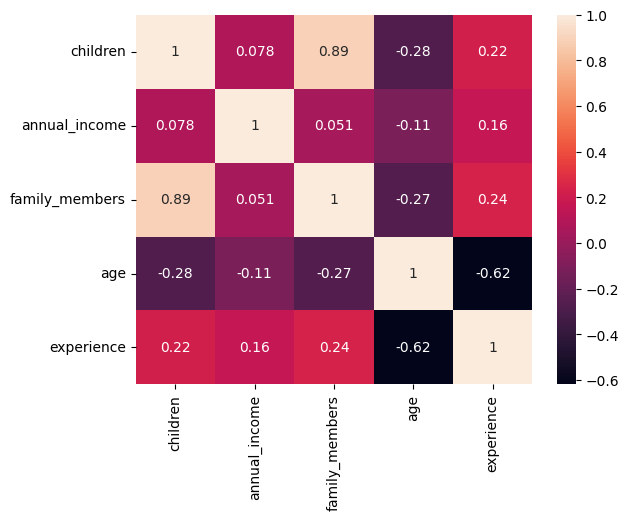

In [16]:
sns.heatmap(df.corr(), annot=True)

# **Univariate Analysis**

**Count plot for categorical variables(String data type)**

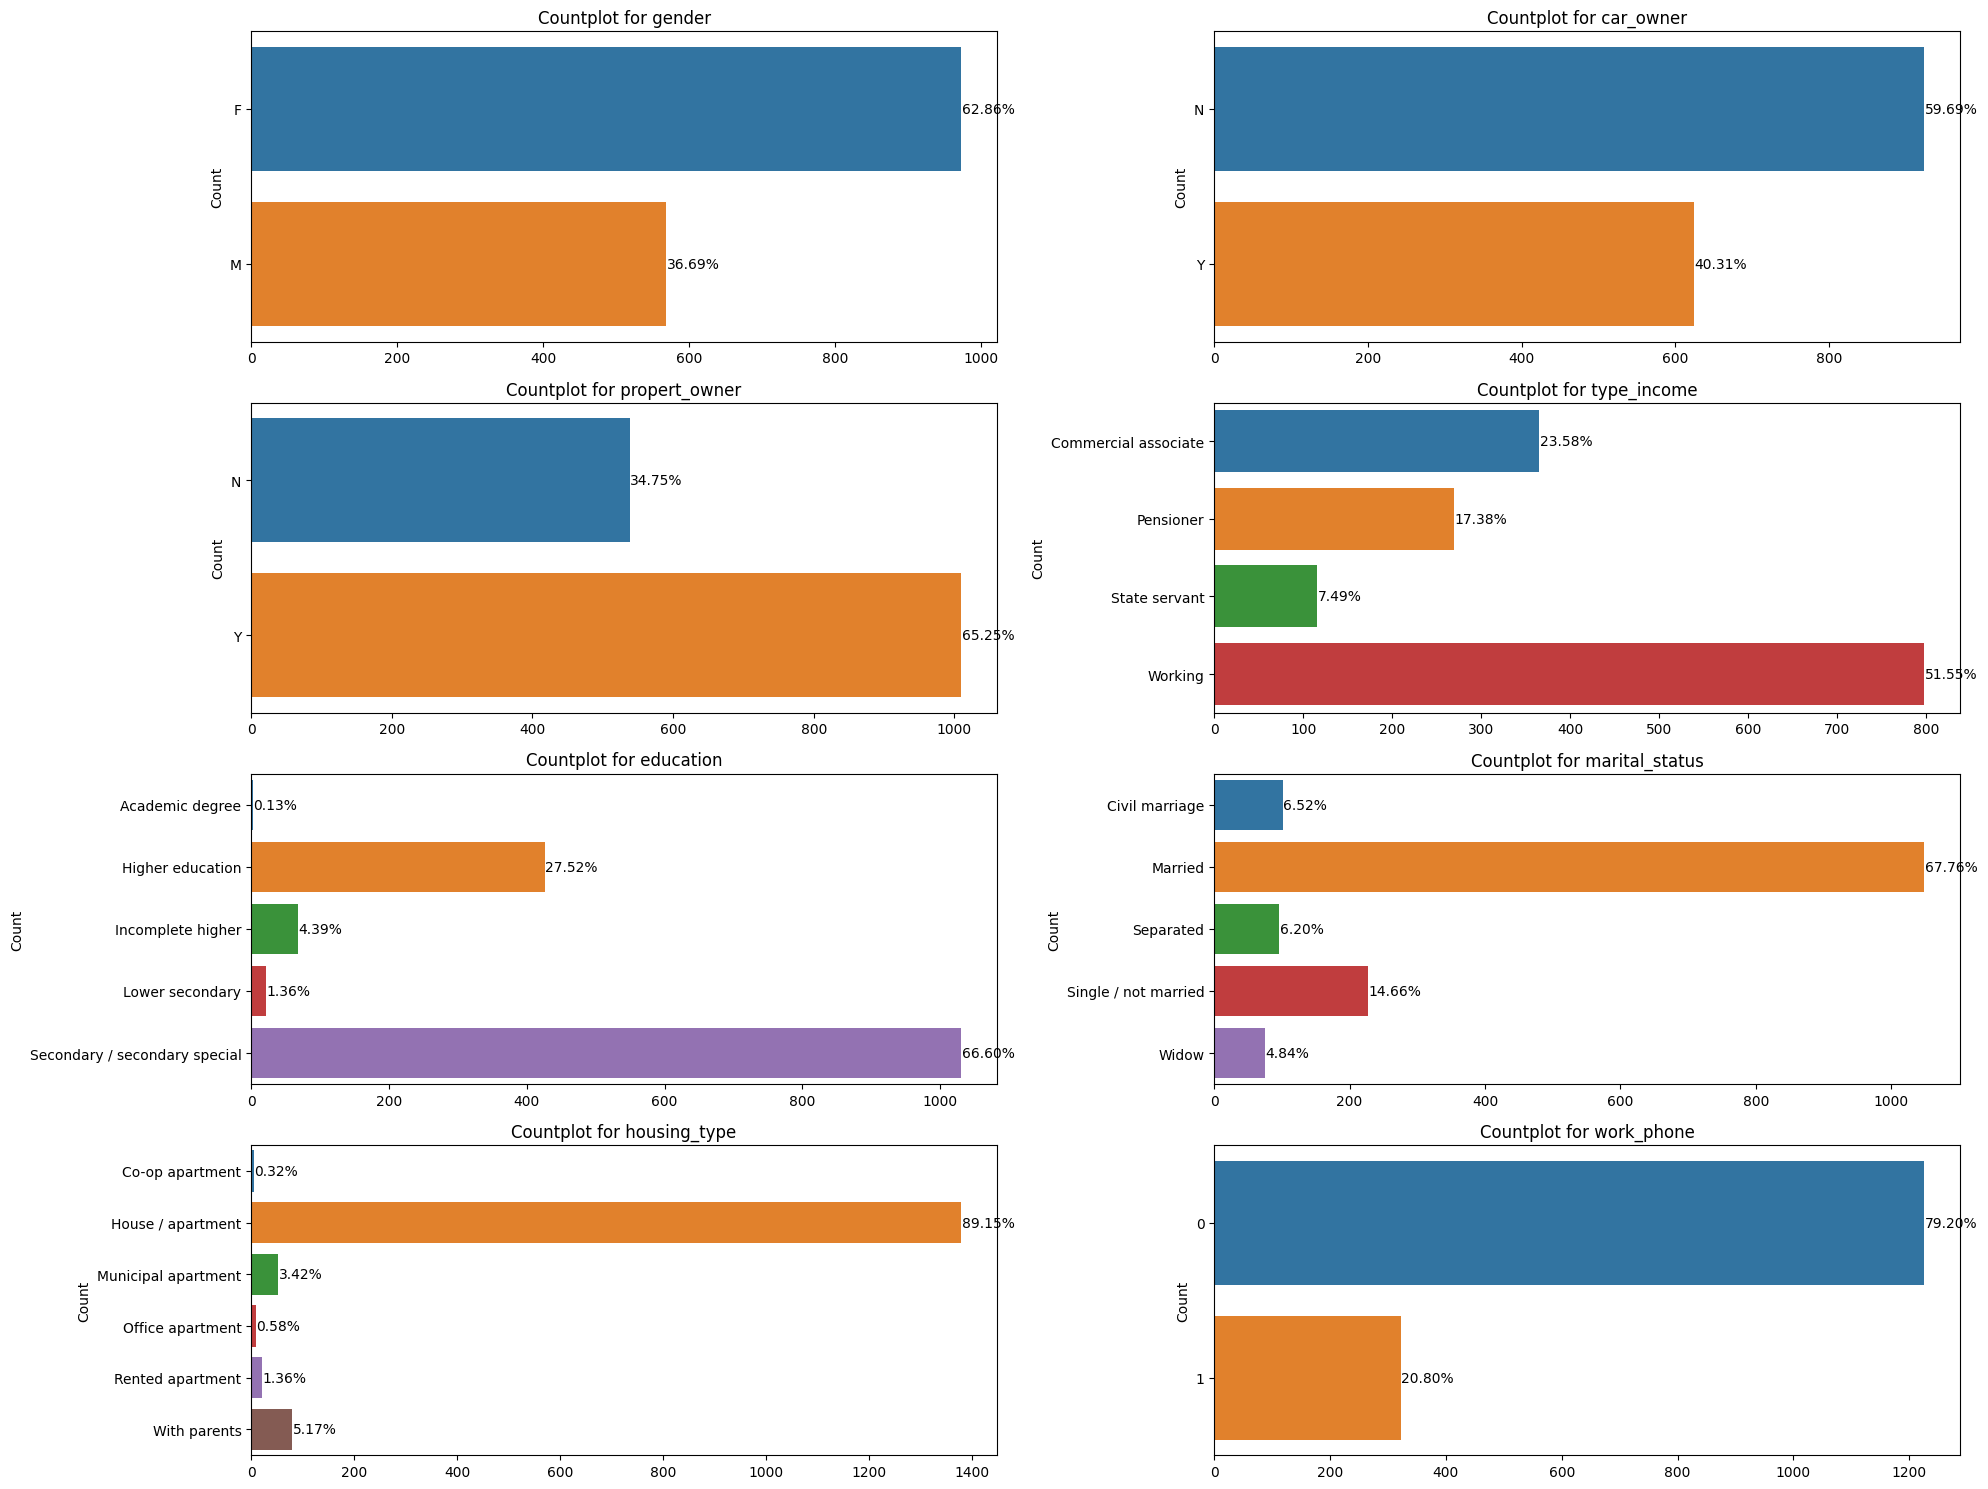

In [17]:
# Filter columns with dtype 'object'
object_columns = df.select_dtypes(include=['category'])

# Define the number of rows and columns for the subplot grid
n_rows = 4 # You can adjust this based on your preference
n_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through the object columns and create count plots
for i, column in enumerate(object_columns.columns):
    if i < n_rows * n_cols:
        ax = axes[i]
        sns.countplot(data=df, y=column, ax=ax)
        ax.set_title(f'Countplot for {column}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')

# Remove any empty subplots
for i in range(len(object_columns.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Observations:**
From the above plots we can conclude following points:

1. In the data, we have around 63% females and 37% males.
2. 60% of the individuals don't own any car
3. 65% of the individuals are property owners
4. 51.5% individuals have working income, 24% are commercial associates, 17% are pensioners and 7.5% are state servants.
5. Overall the people have low education background. About 67% of the folks have secondary education, 27% have pursued higher education and only 0.13% have an academic degree.
6. About 68% people are married and 15% are unmarried, 6.5% people have performed civil marriage while about 11% are separated and widowed
7. Maximum people(about 89%) are living in their own houses/apartments, while about 5% are living with parents and the rest are living in municipal apartment or on rent.
8. Maximum people neither have a work phone nor a phone. However, everyone owns a mobile phone
9. 91% people don't have any email id
10. Most of the individuals are laborers (17.3%), then there are corporate staff (11.2%) and managers (8.8%). HR Staff, Reality agents and IT Staff are least in numbers.

**Count plot for Discerte Numerical data**

Text(0.5, 0, 'Children')

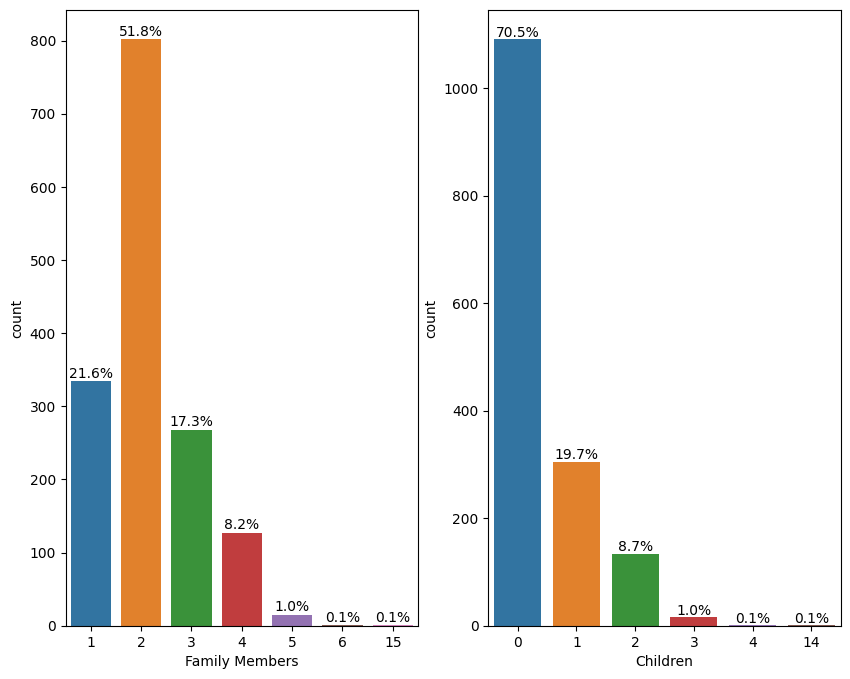

In [18]:
# Setting the figure size
plt.figure(figsize = (10,8))

#Plotting graphs in subplots
plt.subplot(121)
ax = sns.countplot(x = df['family_members'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Family Members")

plt.subplot(122)
ax = sns.countplot(x = df['children'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Children")

**Observations:**
1. About 52% individuals have a family of 2 members and most individuals have are living in a family of 1-3 members.
2. About 70% people don't have any children.

In [19]:
# Checking value counts to understand the extreme values
df['experience'].value_counts()

-999.0    261
 2.0      149
 5.0      130
 3.0      113
 4.0      110
 7.0      108
 1.0      105
 6.0       83
 10.0      67
 9.0       64
 8.0       56
 11.0      48
 13.0      27
 15.0      27
 12.0      25
 14.0      21
 16.0      20
 19.0      20
 20.0      15
 21.0      14
 23.0      14
 18.0      12
 17.0      11
 22.0       8
 24.0       6
 26.0       6
 32.0       5
 30.0       5
 28.0       3
 33.0       3
 34.0       2
 27.0       2
 36.0       2
 37.0       1
 41.0       1
 35.0       1
 25.0       1
 38.0       1
 29.0       1
Name: experience, dtype: int64

In [20]:
# Replacing extreme values of employed days to 0
df.loc[df['experience']<0, ['experience']] = 0

**Box Plot and Histplot for Continuous columns**

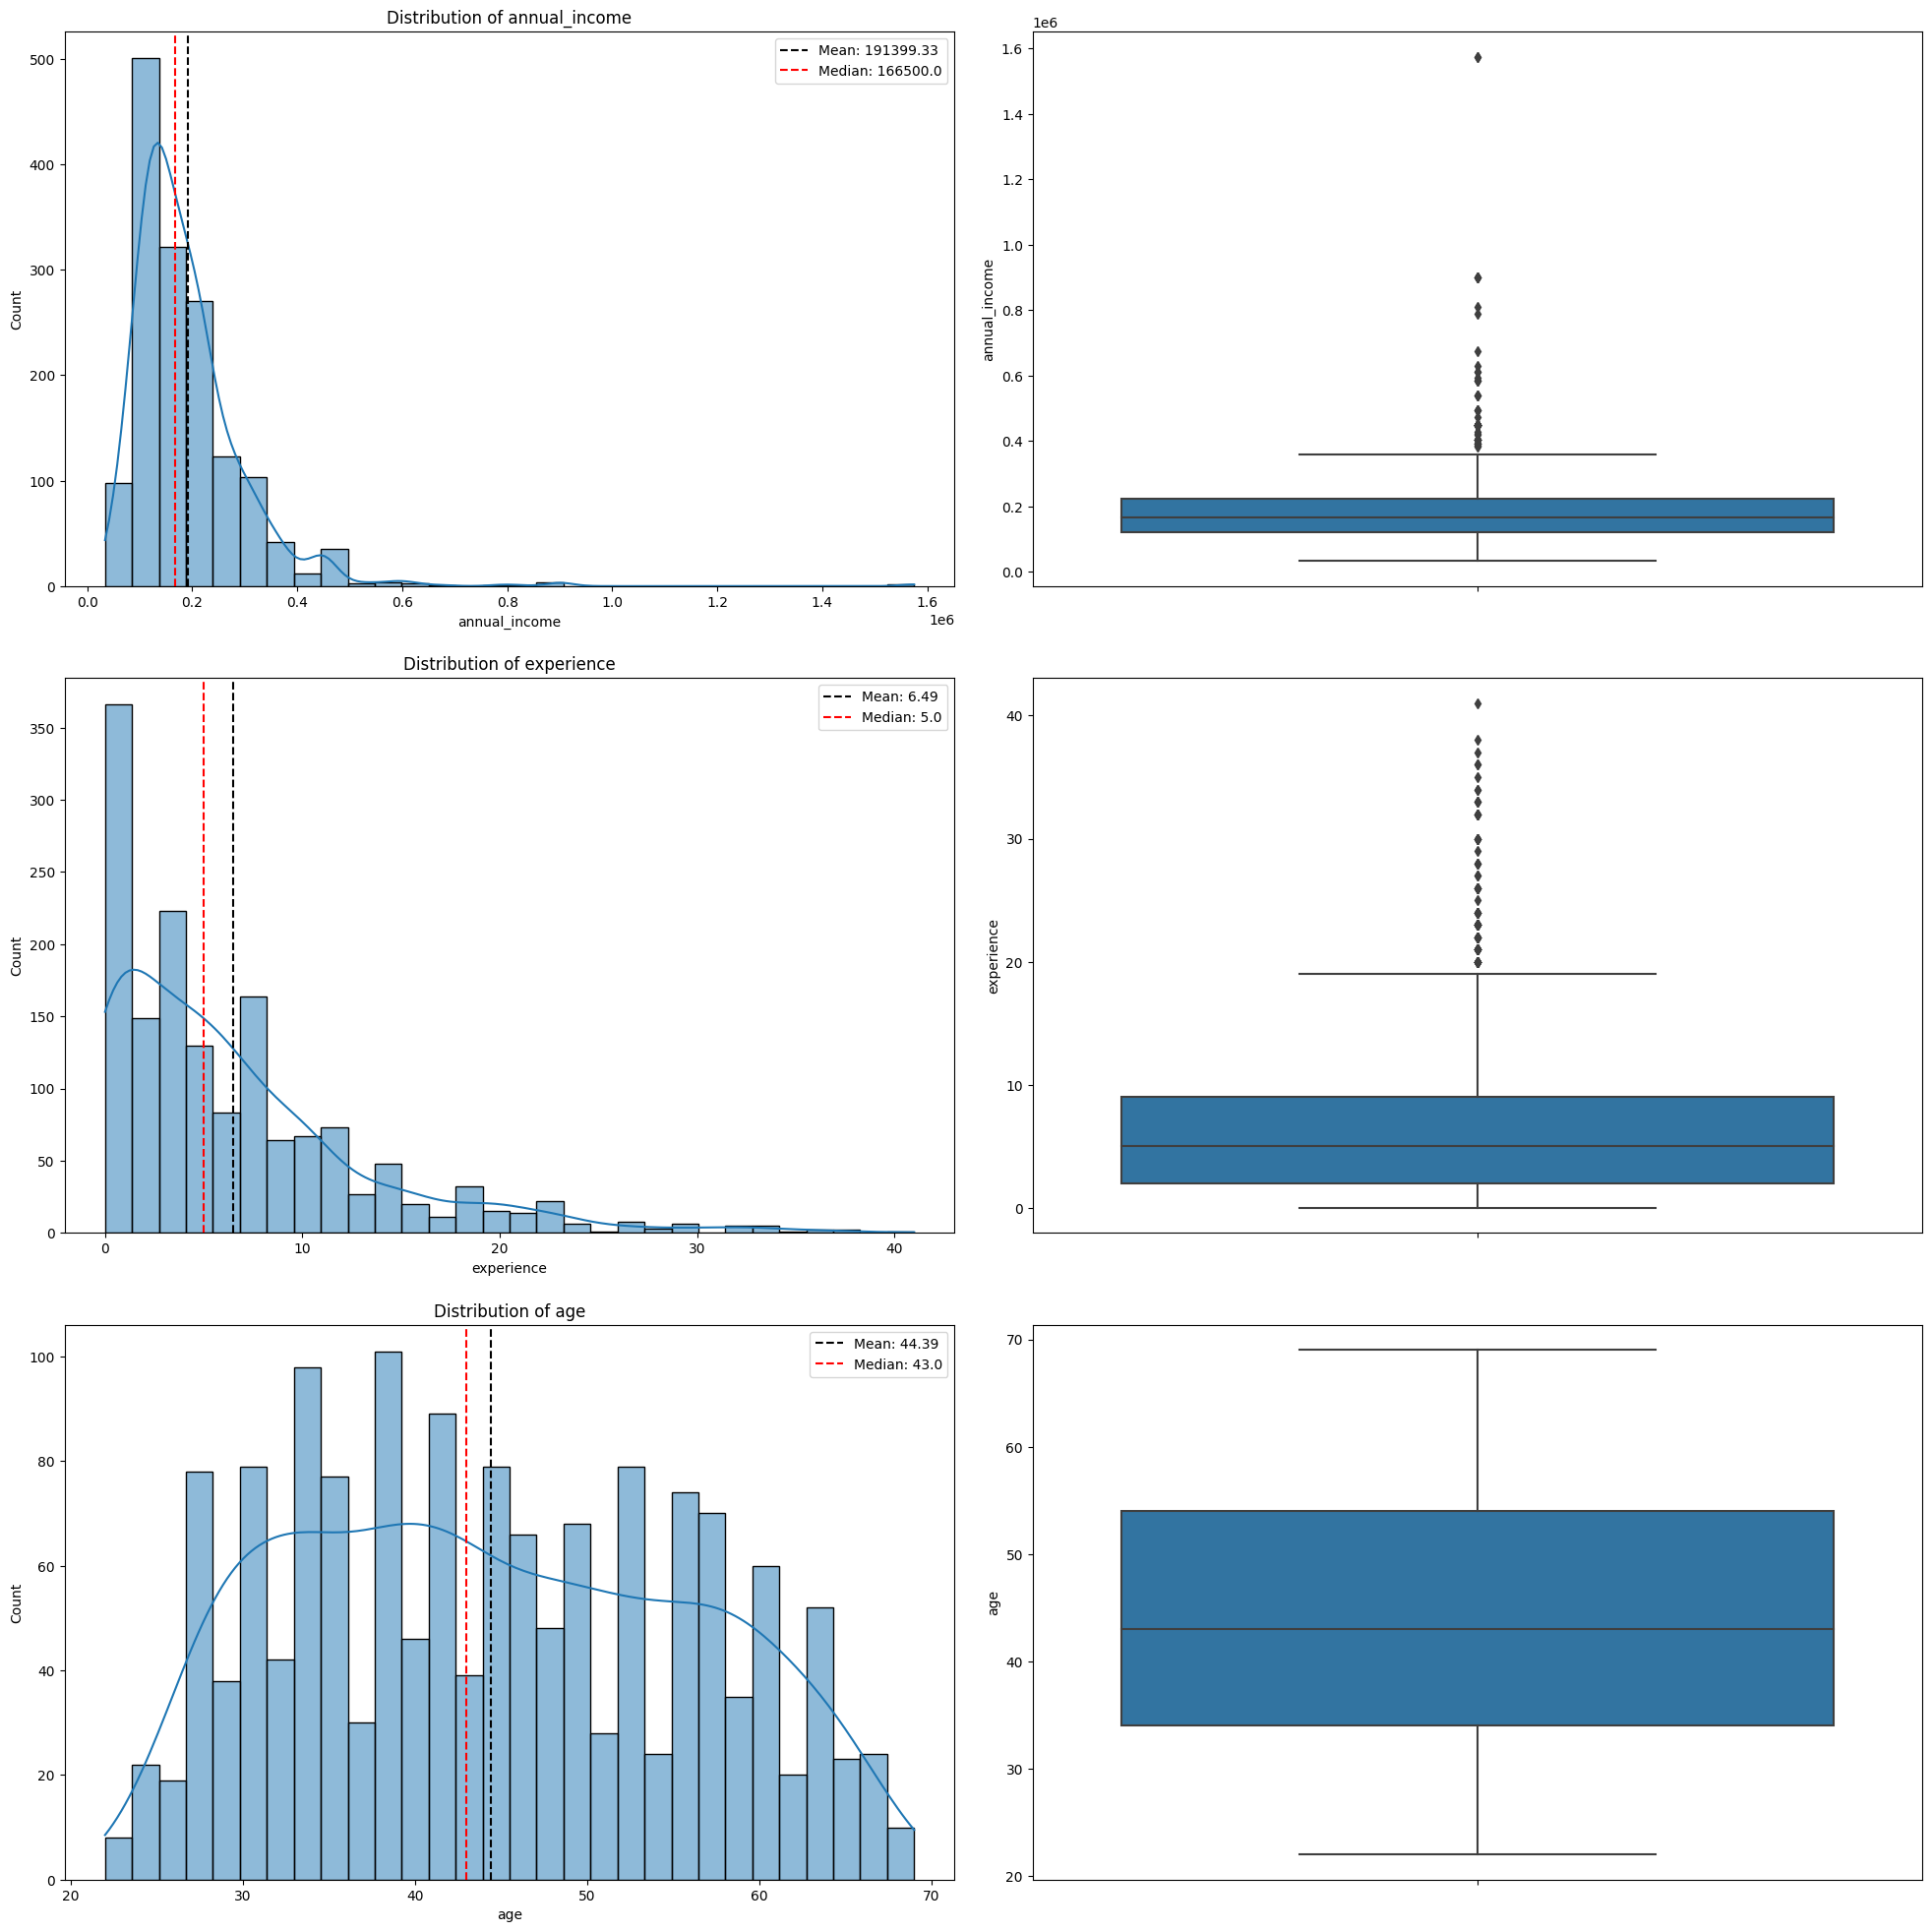

In [21]:
continous = ['annual_income','experience','age']
fig, axes = plt.subplots(3,2, figsize=(20,20)) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0
k = 1

for i in continous:
    ax = sns.histplot(x=df[i], ax =axes[j] ,kde = True, bins = 30)
    ax.axvline(x = df[i].mean(), c= 'black', ls = '--', label =f"Mean: {round(df[i].mean(), 2)}")
    ax.axvline(x = df[i].median(), c= 'r', ls = '--', label =f"Median: {round(df[i].median(), 2)}")
    ax.set_title(f"Distribution of {i}")
    ax.legend()
    j+=2
for i in continous:
    ax= sns.boxplot(y = df[i], ax =axes[k])
    k+=2

plt.tight_layout(w_pad = 2, pad = 2)
plt.show()


Observation : Outliers are present in columns 'annual_income', 'experience' and Data is Skewed.

# **Bivariate Analysis**

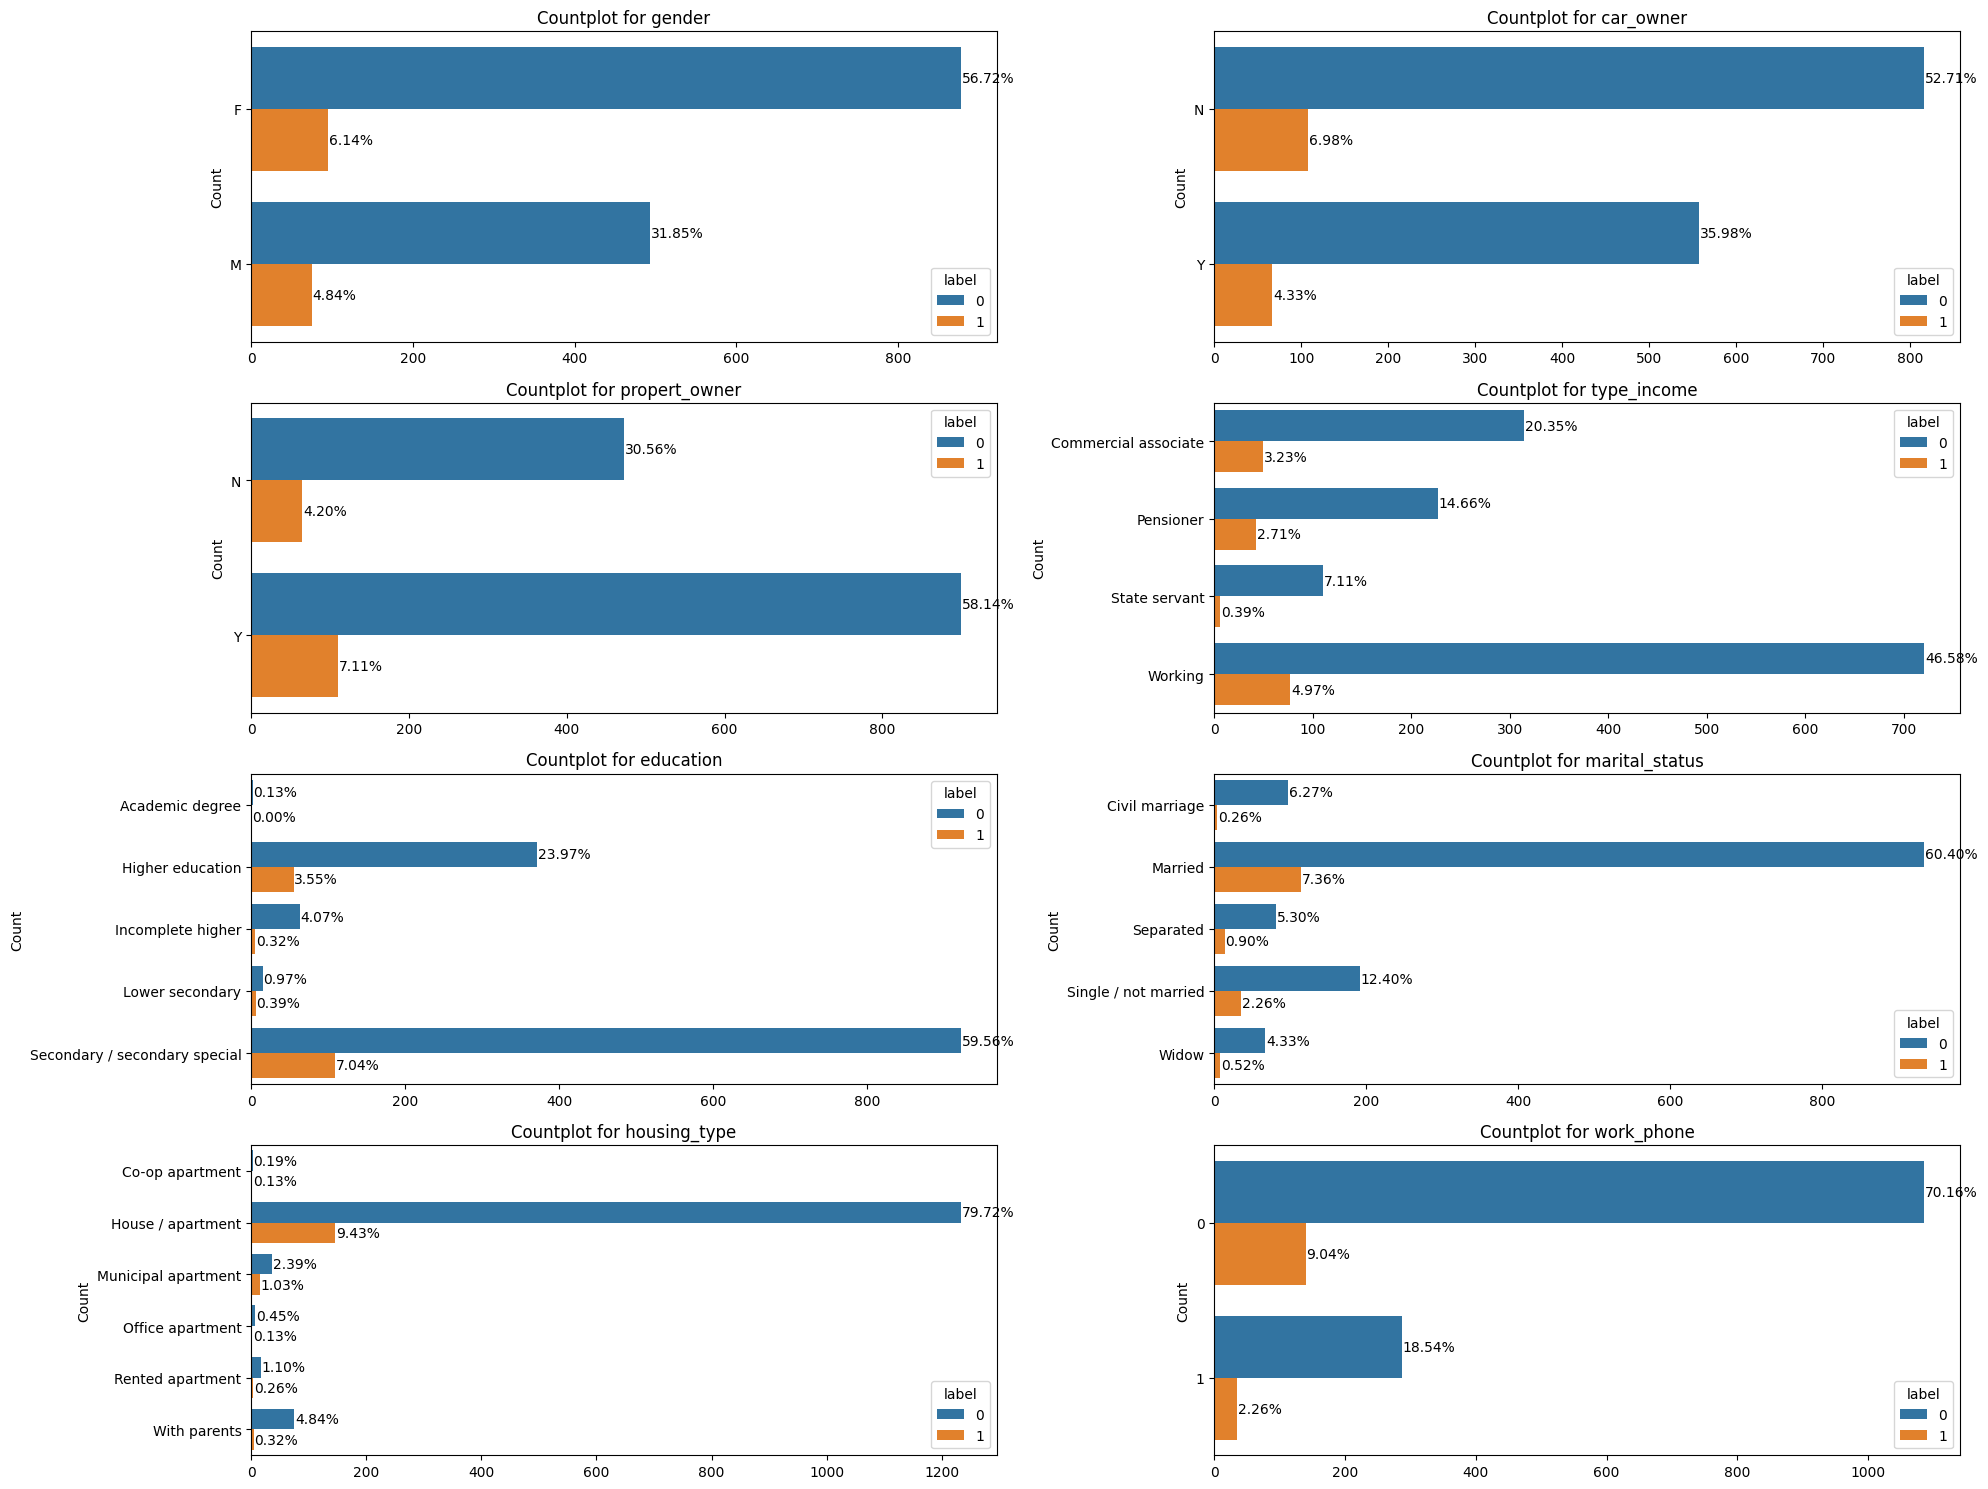

In [22]:
# Filter columns with dtype 'object'
object_columns = df.select_dtypes(include=['category'])

# Define the number of rows and columns for the subplot grid
n_rows = 4 # You can adjust this based on your preference
n_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through the object columns and create count plots
for i, column in enumerate(object_columns.columns):
    if i < n_rows * n_cols:
        ax = axes[i]
        sns.countplot(data=df, y=column, ax=ax, hue='label')
        ax.set_title(f'Countplot for {column}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')

# Remove any empty subplots
for i in range(len(object_columns.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Observations:**
1. Rejected applications are higher in females compared to males.
2. Since, the number of females are higher in the data the accepted application are also higher.
3. Persons not having a car have higher rejection rate.
4. Those who own a car have higher chances of credit applications to be accepted.
5. Most of the individuals are working, so their accepted and rejected rate is higher.
6. State Servant category has the highest accepted to rejected application ratio and then comes the working category individuals.
7. Pensioner category has the lowest accepted to rejected applications ratio.
8. Individuals owning a property have a higher rejection rate.
9. But, the accepted to rejected applications ratio is also higher, which indicates people owning a property have a higher chances of approval of credit applications.
10. No applications were rejected for academic degree holders
11. Individuals having lower secondary education have the lowest accepted to rejected applications ratio, which indicates that if a person is having lower secondary education background, then there are higher chances of the application being rejected
12. Most applications were rejected for secondary education category, which is certainly due to majority reason.
13. Married individuals have highest rejected applications. This is certainly due to majority reason.
14. Individuals having Civil Marriage have highest accepted to rejected applications ratio. This indicates that people having civil marriage have highest chances of approval of credit card application.
15. Single individuals have lowest accepted to rejected applications ratio.


# **Data Preprocessing**

In [23]:
# Splitting the data into input and target
x = df.drop(columns=['label'])
y = df['label']

In [24]:
x

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,type_occupation,family_members,age,experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,NaN,2,52.0,0.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,38.0,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,NaN,2.0
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,38.0,2.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,0,0,0,Managers,2,33.0,6.0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,0,0,0,Accountants,1,28.0,4.0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,0,0,0,Managers,4,37.0,7.0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,Drivers,2,42.0,2.0


# **Handling missing values**

In [25]:
# Null values in terms of percentage
x.isnull().mean()* 100

gender              0.452196
car_owner           0.000000
propert_owner       0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
work_phone          0.000000
phone               0.000000
email_id            0.000000
type_occupation    31.524548
family_members      0.000000
age                 1.421189
experience          0.000000
dtype: float64

In [26]:
# Droping the type_occupation feature as it contain 31.52% of null value.
x.drop(columns=['type_occupation'], inplace=True)

 Observation : Looking at the data ,we say that 'Type_Occupation' has a lot of missing values ,around 488 ,which is why we removing it .

# **Replacing Null Values**

In [27]:
# Filling null values of the remaining Feature with appropriate statistical values
x['gender'] = x['gender'].fillna('F')

x['annual_income'] = x['annual_income'].fillna(round(x['annual_income'].median()))

x['age'] = x['age'].fillna(round(x['age'].mean()))

Observation : 'gender' column replacing with 'F','annual_income' column replacing with median and 'age' column replacing with mean




In [28]:
# Checking for null values
x.isnull().sum()

gender            0
car_owner         0
propert_owner     0
children          0
annual_income     0
type_income       0
education         0
marital_status    0
housing_type      0
work_phone        0
phone             0
email_id          0
family_members    0
age               0
experience        0
dtype: int64

In [29]:
# Merging cleaned input & Target variables
data_cleaned = pd.concat([x, y], axis = 1)

# Exporting the Cleaned dataset to CSV file
from google.colab import files
data_cleaned.to_csv('credit.csv')
files.download('credit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Skewness**

In [30]:
# Treating Skewness
x['annual_income'] = np.log(x['annual_income'])

0.20435042715410795

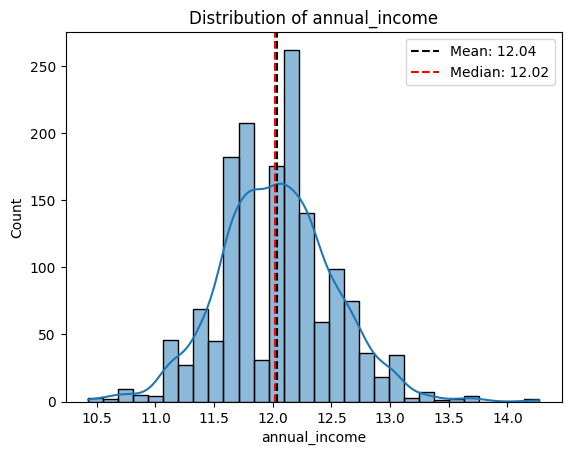

In [31]:
sns.histplot(x= x['annual_income'],kde = True, bins = 30)
plt.axvline(x = x['annual_income'].mean(), c= 'black', ls = '--', label =f"Mean: {round(x['annual_income'].mean(), 2)}")
plt.axvline(x = x['annual_income'].median(), c= 'r', ls = '--', label =f"Median: {round(x['annual_income'].median(), 2)}")
plt.title('Distribution of annual_income')
plt.legend()

x['annual_income'].skew()

In [32]:
# Treating Skewness
x['experience'] = np.sqrt(x['experience'])

0.1568331036422731

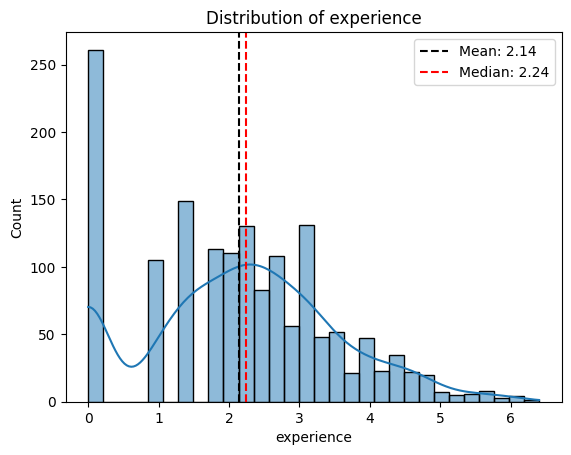

In [33]:
sns.histplot(x= x['experience'],kde = True, bins = 30)
plt.axvline(x = x['experience'].mean(), c= 'black', ls = '--', label =f"Mean: {round(x['experience'].mean(), 2)}")
plt.axvline(x = x['experience'].median(), c= 'r', ls = '--', label =f"Median: {round(x['experience'].median(), 2)}")
plt.title('Distribution of experience')
plt.legend()

x['experience'].skew()

# **Feature Encoding**

In [34]:
# Feature encoding for categorical columns
x = pd.get_dummies(x, columns=['gender','car_owner','propert_owner','type_income','marital_status','housing_type'])

Observation :Encoding categorical features of the dataset

In [35]:
x

,children,annual_income,education,work_phone,phone,email_id,family_members,age,experience,gender_F,...,marital_status_Married,marital_status_Separated,marital_status_Single / not married,marital_status_Widow,housing_type_Co-op apartment,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents
0,0,12.100712,Higher education,0,0,0,2,52.0,0.000000,0,...,1,0,0,0,0,1,0,0,0,0
1,0,12.660328,Higher education,1,1,0,2,38.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
2,0,12.660328,Higher education,1,1,0,2,44.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
3,0,12.022751,Higher education,1,1,0,2,38.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
4,0,12.660328,Higher education,1,1,0,2,38.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,12.022751,Higher education,0,0,0,2,33.0,2.449490,1,...,1,0,0,0,0,1,0,0,0,0
1544,0,12.323856,Incomplete higher,0,0,0,1,28.0,2.000000,1,...,0,0,1,0,0,1,0,0,0,0
1545,2,12.100712,Higher education,0,0,0,4,37.0,2.645751,0,...,1,0,0,0,0,1,0,0,0,0
1546,0,12.506177,Secondary / secondary special,1,1,0,2,42.0,1.414214,0,...,0,0,0,0,0,1,0,0,0,0






# **Data Splitting**

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
category =['Academic degree','Higher education','Secondary / secondary special','Lower secondary','Incomplete higher']

ordinal = OrdinalEncoder(categories=[category])
x_train['education'] = ordinal.fit_transform(x_train[['education']])

x_test['education'] = ordinal.transform(x_test[['education']])


In [38]:
x_train

,children,annual_income,education,work_phone,phone,email_id,family_members,age,experience,gender_F,...,marital_status_Married,marital_status_Separated,marital_status_Single / not married,marital_status_Widow,housing_type_Co-op apartment,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents
680,0,12.218495,2.0,0,0,0,1,58.0,0.000000,1,...,0,0,0,1,0,1,0,0,0,0
1079,2,11.967181,2.0,0,0,0,3,39.0,2.236068,0,...,0,1,0,0,0,0,0,0,0,1
1190,1,12.911642,2.0,0,1,1,3,47.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
864,0,12.100712,2.0,0,0,0,1,57.0,0.000000,1,...,0,0,1,0,0,1,0,0,0,0
743,0,11.813030,2.0,1,0,0,2,44.0,1.414214,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,12.660328,1.0,1,1,1,2,45.0,1.000000,1,...,1,0,0,0,0,1,0,0,0,0
1294,1,12.218495,2.0,1,0,0,3,28.0,1.000000,0,...,1,0,0,0,0,1,0,0,0,0
860,2,11.630709,2.0,0,1,0,4,36.0,1.000000,0,...,1,0,0,0,0,1,0,0,0,0
1459,0,12.049419,1.0,0,0,0,2,51.0,3.316625,1,...,1,0,0,0,0,1,0,0,0,0


# **Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)

x_test = scale.transform(x_test)

In [40]:
x_train

array([[-0.52455662,  0.3424131 ,  0.27991157, ..., -0.06978632,
        -0.12146645, -0.22170373],
       [ 1.9635702 , -0.17328496,  0.27991157, ..., -0.06978632,
        -0.12146645,  4.51052409],
       [ 0.71950679,  1.76475348,  0.27991157, ..., -0.06978632,
        -0.12146645, -0.22170373],
       ...,
       [ 1.9635702 , -0.86372714,  0.27991157, ..., -0.06978632,
        -0.12146645, -0.22170373],
       [-0.52455662, -0.0045321 , -1.23332216, ..., -0.06978632,
        -0.12146645, -0.22170373],
       [-0.52455662, -0.86372714, -1.23332216, ..., -0.06978632,
        -0.12146645, -0.22170373]])

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

SMOTE = SMOTE()
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

print("After oversampling: ",Counter(y_train_SMOTE))
print("Before oversampling: ",Counter(y_train))

After oversampling:  Counter({0: 1093, 1: 1093})
Before oversampling:  Counter({0: 1093, 1: 145})


# **Data Modelling**

**Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

model = LogisticRegression()
model.fit(x_train_SMOTE,y_train_SMOTE)

y_pred=model.predict(x_test)
y_pred_train =model.predict(x_train)

print('Train Accuracy score =', accuracy_score(y_train,y_pred_train))
print('Test Accuracy score =', accuracy_score(y_test,y_pred))
print('precision score =', precision_score(y_test, y_pred))
print('recall score =', recall_score(y_test, y_pred))

# Confusion Matrix
print('confusion_matrix =', confusion_matrix(y_test, y_pred) )

Train Accuracy score = 0.5864297253634895
Test Accuracy score = 0.635483870967742
precision score = 0.16260162601626016
recall score = 0.6666666666666666
confusion_matrix = [[177 103]
 [ 10  20]]


Logistic Regression model got accuracy of 58% for Train data and 63% for Test data which is considered a bad accuracy for the dataset.

**Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model= DecisionTreeClassifier()
model.fit(x_train_SMOTE,y_train_SMOTE)

y_pred=model.predict(x_test)
y_pred_train =model.predict(x_train)

print("train_accuracy", accuracy_score(y_train,y_pred_train))
print("test_accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train_accuracy 0.9935379644588045
test_accuracy 0.8516129032258064
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       280
           1       0.33      0.50      0.39        30

    accuracy                           0.85       310
   macro avg       0.63      0.69      0.66       310
weighted avg       0.88      0.85      0.87       310



Decision Tree Classifier got accuracy of 99% for the Train data and 84% for the Test data which is considered as bad accuracy of the dataset.

**Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

model=RandomForestClassifier(criterion='entropy',max_depth=10)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train =model.predict(x_train)

train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("Train_accuracy_score", accuracy_score(y_train,y_pred_train))
print("Test_accuracy_score", accuracy_score(y_test,y_pred))
print("confusion_matrix",confusion_matrix)
print(classification_report(y_test,y_pred))

Train_accuracy_score 0.9289176090468497
Test_accuracy_score 0.9096774193548387
confusion_matrix [[1092    1]
 [  87   58]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       280
           1       1.00      0.07      0.12        30

    accuracy                           0.91       310
   macro avg       0.95      0.53      0.54       310
weighted avg       0.92      0.91      0.87       310



Random Forest Classifier got accuracy of 92% for the Train data and 91% for the Test data which is a good accuracy among all the Machine Learning Algorithms for the dataset.

**Support Vector Classifier**

In [45]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train =model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
print("train_accuracy",train_accuracy)
test_accuracy=accuracy_score(y_test,y_pred)
print("test_accuracy",test_accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

train_accuracy 0.8925686591276252
test_accuracy 0.9064516129032258
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       280
           1       0.67      0.07      0.12        30

    accuracy                           0.91       310
   macro avg       0.79      0.53      0.54       310
weighted avg       0.89      0.91      0.87       310



Support Vector Classifier got accuracy of 89% for Train data and 90% for the Test data which is a good accuracy for the dataset.

**KNN Classifier**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,y_pred_train)
print("train_accuracy",train_accuracy)
test_accuracy=accuracy_score(y_test,y_pred)
print("test_accuracy",test_accuracy)

train_accuracy 0.8925686591276252
test_accuracy 0.8774193548387097


KNN Classifier got accuracy of 89% for Train data and 87% for Test data which is considered not a good accuracy of the dataset.

Accuracy of our 5 Algorithms:


1.    Logistic Regression Model Accuracy: Train =58%  Test=63%

1.   Decision Tree Classifier: Train =99%   Test=84%

1.   Random Forest Classifier:  Train =92%  Test=91%

1.   Support Vector Classifier:  Train =89%   Test=90%
2.   KNN Classifier :  Train =89%   Test=87%















From above result we can observe that accuracy of our 5 Algorithm are very close to each other .If we compare all we can conclude that Random Forest Classifier is the best model for Credit Card Approval Prediction